In [82]:
import pandas as pd
import numpy as np

In [83]:
df=pd.read_csv('/content/anime.csv')

In [84]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [86]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [87]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Replacing null values with mean for rating and Unknown for type as rating has more null values if we remove all it may cause effect on model

In [88]:
mean_rating=df['rating'].mean()
df['rating'].fillna(mean_rating,inplace=True)

In [89]:
df['genre'].fillna('Unknown',inplace=True)

In [90]:
df.isnull().sum()

anime_id     0
name         0
genre        0
type        25
episodes     0
rating       0
members      0
dtype: int64

In [91]:
df.dropna()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [92]:
df.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [93]:
numerical_colums=df.select_dtypes(exclude=['object']).columns

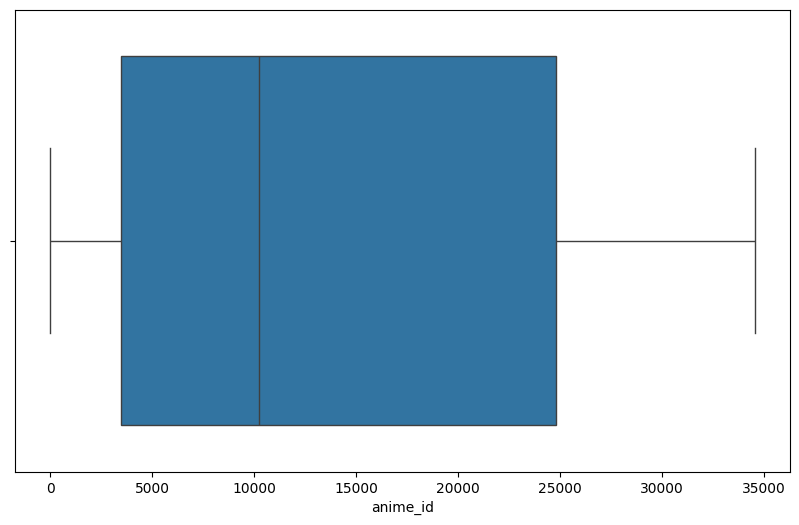

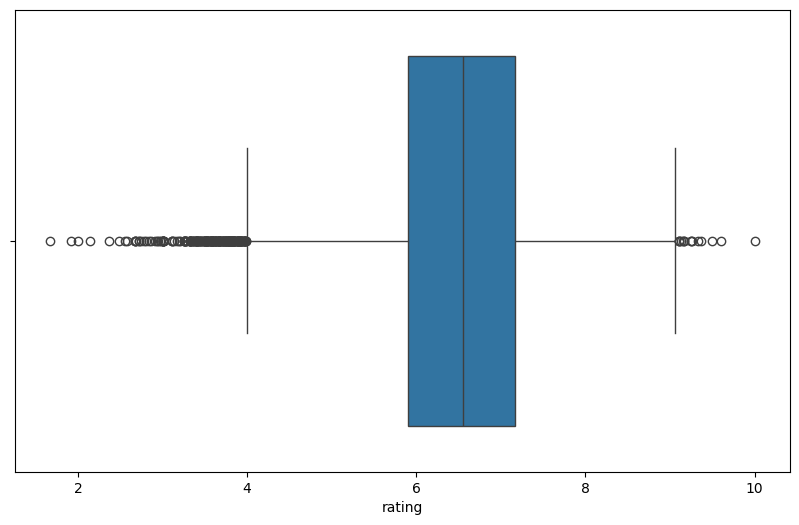

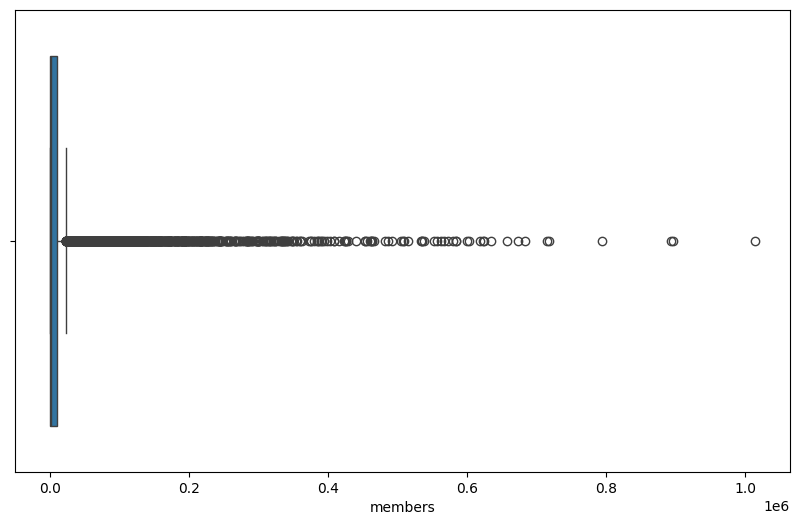

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numerical_colums:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[col])
  plt.show()


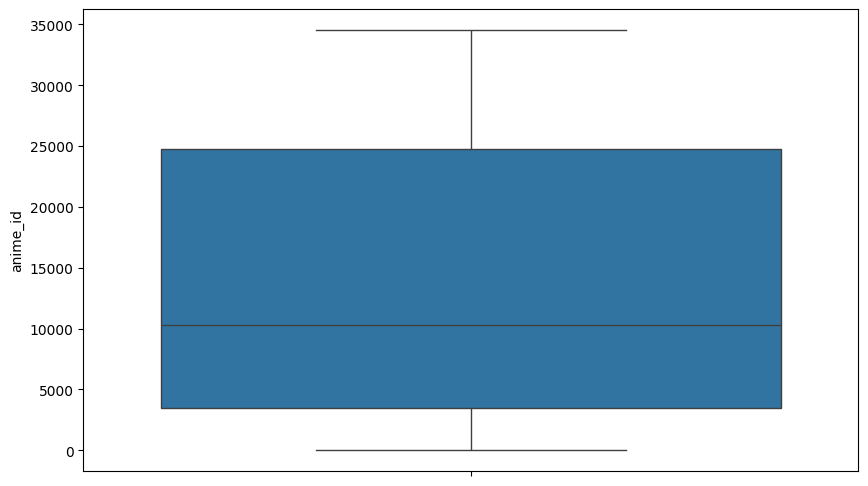

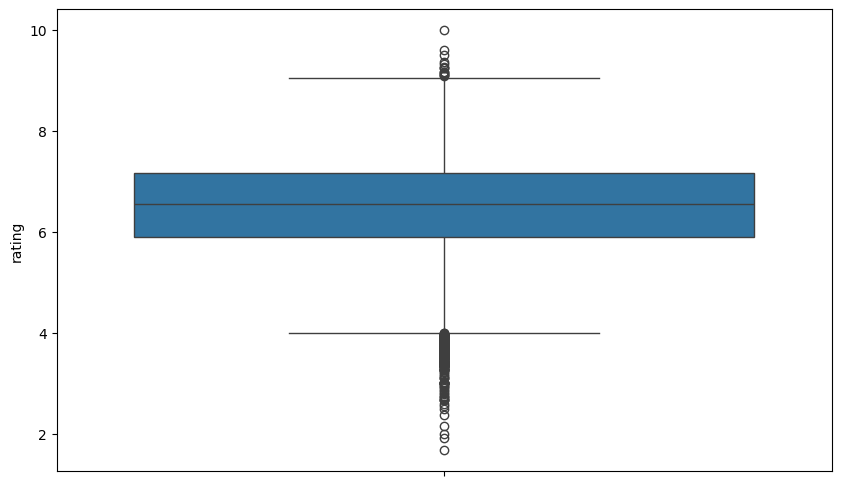

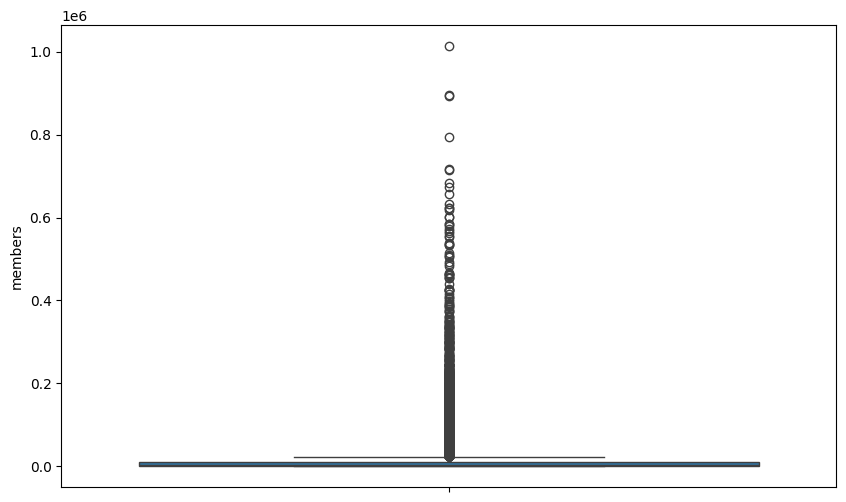

In [95]:
for col in numerical_colums:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[col])
  plt.show()

In [96]:
df['type'].value_counts()

type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64

In [97]:
df['type']=df['type'].replace(["TV","OVA","Movie","Special","ONA","Music"],["0","1","2","3","4","5"])

In [98]:
df['type'].value_counts()

type
0    3787
1    3311
2    2348
3    1676
4     659
5     488
Name: count, dtype: int64

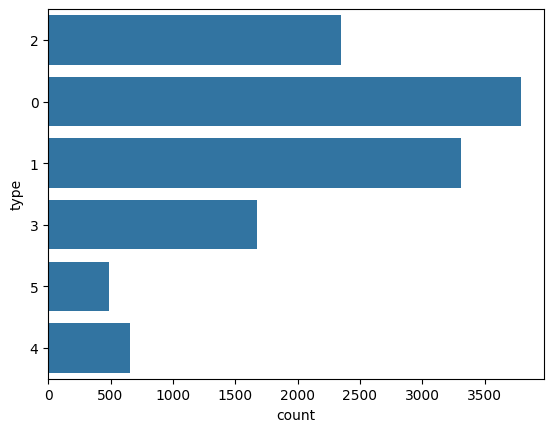

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df['type'])
plt.show()


Splitting the items in genre column

In [100]:
df['genre'] = df['genre'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

In [101]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genre'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)
df = pd.concat([df, genre_df], axis=1)
df.drop('genre', axis=1, inplace=True)


We are transforming the data to binary values and after transforming and concat the data we are removing the original genere as we don't need it

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[['rating','members']]=scaler.fit_transform(df[['rating','members']])

In [103]:
df.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,2,1,0.924370,0.197872,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,0,64,0.911164,0.782770,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,0,51,0.909964,0.112689,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,0,24,0.900360,0.664325,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,9969,Gintama&#039;,0,51,0.899160,0.149186,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [104]:

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def compute_similarity_matrix(data):
    features = data.drop(columns=['anime_id', 'name', 'type', 'episodes'])
    similarity_matrix = cosine_similarity(features)
    return similarity_matrix


In [105]:
def recommend_anime(anime_name, data, similarity_matrix, threshold=0.5, top_n=10):
    if anime_name not in data['name'].values:
        raise ValueError(f"Anime '{anime_name}' not found in the dataset.")
    target_index = data[data['name'] == anime_name].index[0]

    similarity_scores = similarity_matrix[target_index]

    similar_anime_indices = np.where(similarity_scores >= threshold)[0]

    similar_anime_indices = similar_anime_indices[similar_anime_indices != target_index]


    similar_anime_sorted = sorted(similar_anime_indices, key=lambda idx: similarity_scores[idx], reverse=True)

    top_similar_anime_indices = similar_anime_sorted[:top_n]

    recommended_anime = [(data.iloc[idx]['name'], similarity_scores[idx]) for idx in top_similar_anime_indices]

    return recommended_anime



In [106]:

target_anime = 'Fullmetal Alchemist: Brotherhood'
similarity_matrix = compute_similarity_matrix(df)
recommended_anime = recommend_anime(target_anime, df, similarity_matrix, threshold=0.5, top_n=10)


for anime, score in recommended_anime:
    print(f"Anime: {anime}, Similarity Score: {score}")


Anime: Fullmetal Alchemist, Similarity Score: 0.9403002216035355
Anime: Fullmetal Alchemist: The Sacred Star of Milos, Similarity Score: 0.9097400987773491
Anime: Fullmetal Alchemist: Brotherhood Specials, Similarity Score: 0.9050155062091486
Anime: Magi: The Labyrinth of Magic, Similarity Score: 0.8581653626375616
Anime: Magi: The Kingdom of Magic, Similarity Score: 0.8534187162572708
Anime: Densetsu no Yuusha no Densetsu, Similarity Score: 0.8425761012988994
Anime: Magi: Sinbad no Bouken (TV), Similarity Score: 0.837844711656861
Anime: Magi: Sinbad no Bouken, Similarity Score: 0.8353491191624146
Anime: Tales of Vesperia: The First Strike, Similarity Score: 0.8323608195710248
Anime: Tsubasa Chronicle: Tori Kago no Kuni no Himegimi, Similarity Score: 0.8314369137210732


In [107]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [108]:

similarity_matrix = compute_similarity_matrix(df)


X_train = train_data[['rating']]


train_data['recommended_anime'] = train_data.apply(lambda row: recommend_anime(row['name'], df, similarity_matrix), axis=1)
Y_train = train_data[['recommended_anime']]

X_test = test_data[['rating']]


test_data['recommended_anime'] = test_data.apply(lambda row: recommend_anime(row['name'], df, similarity_matrix), axis=1)
Y_test = test_data[['recommended_anime']]

In [110]:
similarity_matrix = compute_similarity_matrix(df)
X_train = train_data[['rating']]
X_test = test_data[['rating']]

def get_avg_top_recommended_rating(row, df, similarity_matrix, top_n=10):
    recommendations = recommend_anime(row['name'], df, similarity_matrix, top_n=top_n)
    if recommendations:
        top_ratings = [score for _, score in recommendations]
        return sum(top_ratings) / len(top_ratings)
    else:
        return 0

train_data['avg_top_recommended_rating'] = train_data.apply(
    lambda row: get_avg_top_recommended_rating(row, df, similarity_matrix), axis=1
)
Y_train = train_data[['avg_top_recommended_rating']]

test_data['avg_top_recommended_rating'] = test_data.apply(
    lambda row: get_avg_top_recommended_rating(row, df, similarity_matrix), axis=1
)
Y_test = test_data[['avg_top_recommended_rating']]

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


threshold = 0.1
train_correct = np.sum(np.abs(Y_train['avg_top_recommended_rating'].values - y_train_pred.flatten()) <= threshold)
test_correct = np.sum(np.abs(Y_test['avg_top_recommended_rating'].values - y_test_pred.flatten()) <= threshold)

train_accuracy = train_correct / len(Y_train)
test_accuracy = test_correct / len(Y_test)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

relevant_threshold = 0.5
train_relevant = np.sum(Y_train['avg_top_recommended_rating'].values >= relevant_threshold)
test_relevant = np.sum(Y_test['avg_top_recommended_rating'].values >= relevant_threshold)

train_recommended_relevant = np.sum((y_train_pred.flatten() >= relevant_threshold) &
                                   (np.abs(Y_train['avg_top_recommended_rating'].values - y_train_pred.flatten()) <= threshold))
test_recommended_relevant = np.sum((y_test_pred.flatten() >= relevant_threshold) &
                                  (np.abs(Y_test['avg_top_recommended_rating'].values - y_test_pred.flatten()) <= threshold))

if train_relevant > 0:
    train_recall = train_recommended_relevant / train_relevant
else:
    train_recall = 0

if test_relevant > 0:
    test_recall = test_recommended_relevant / test_relevant
else:
    test_recall = 0

print(f"Train Recall: {train_recall}")
print(f"Test Recall: {test_recall}")

Train Accuracy: 0.8929334011184545
Test Accuracy: 0.8962993086620578
Train Recall: 0.8929334011184545
Test Recall: 0.8962993086620578
